# Import Dependencies
---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

import geopandas as gpd
import geodatasets

from pyproj import Geod

In [2]:
# Loading world data for the basemap
world_path = geodatasets.get_path("naturalearth.land")
world = gpd.read_file(world_path)

In [3]:
# City, lon, lat
bogota = (-74.0722, 4.7111)
comodoro_rivadavia = (-67.4808, -45.8647)
delhi = (77.2300, 28.6100)
east_london = (27.9047, -33.0175)
jakarta = (106.8275, -6.175)
lagos = (3.3841, 6.4550)
melbourne = (144.9631, -37.8142)
paris = (2.3522, 48.8567)
san_francisco = (-122.4449, 37.7558 )
tokyo = (139.6922, 35.6897)
toronto = (-79.3733, 43.7417)

cities = [bogota, comodoro_rivadavia, delhi, east_london, jakarta, lagos, melbourne, paris, tokyo, san_francisco, toronto]

# Points
---

In [4]:
points_geometry = [Point(*city) for city in cities]

In [5]:
points_gdf = gpd.GeoDataFrame(geometry=points_geometry)

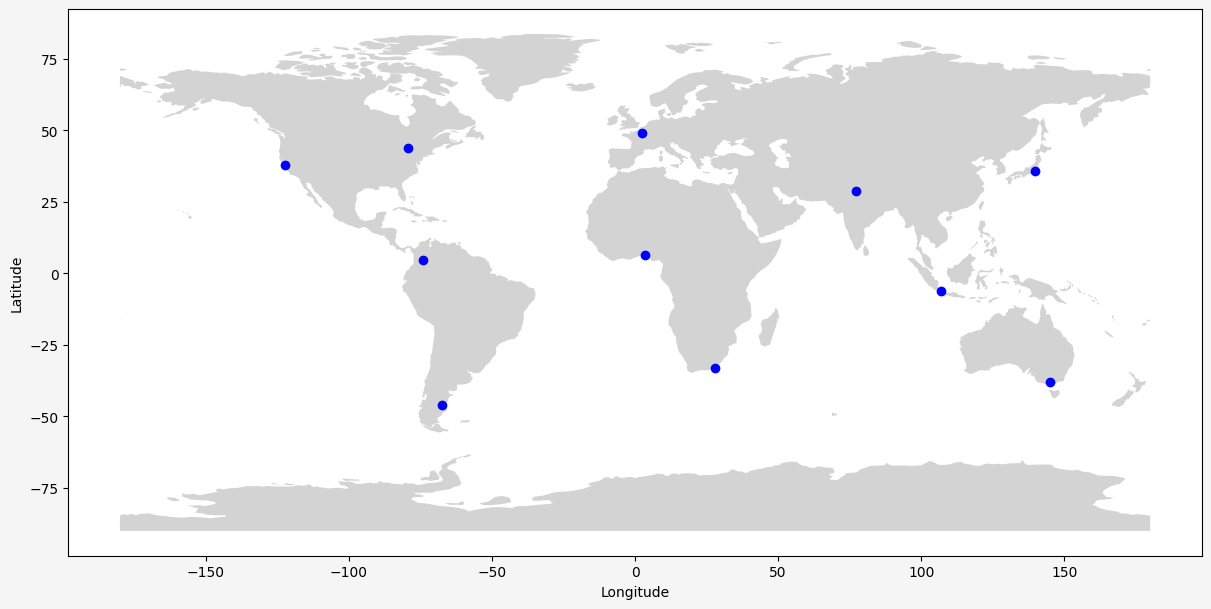

In [6]:
fig, ax = plt.subplots(figsize=(12, 8), facecolor="whitesmoke", layout="constrained")

world.plot(ax=ax, color="lightgrey")
points_gdf.plot(ax=ax, color="blue")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

# Lines
---

In [7]:
sorted_cities = sorted(cities, key=lambda x: x[0])

In [8]:
lines = []
for i, city in enumerate(sorted_cities):
    if i < len(sorted_cities) - 1:
        lines.append(LineString( [city, sorted_cities[i + 1]] ) )
    else:
        lines.append(LineString( [city, sorted_cities[0]] ))

In [9]:
lines_gdf = gpd.GeoDataFrame(geometry=lines)

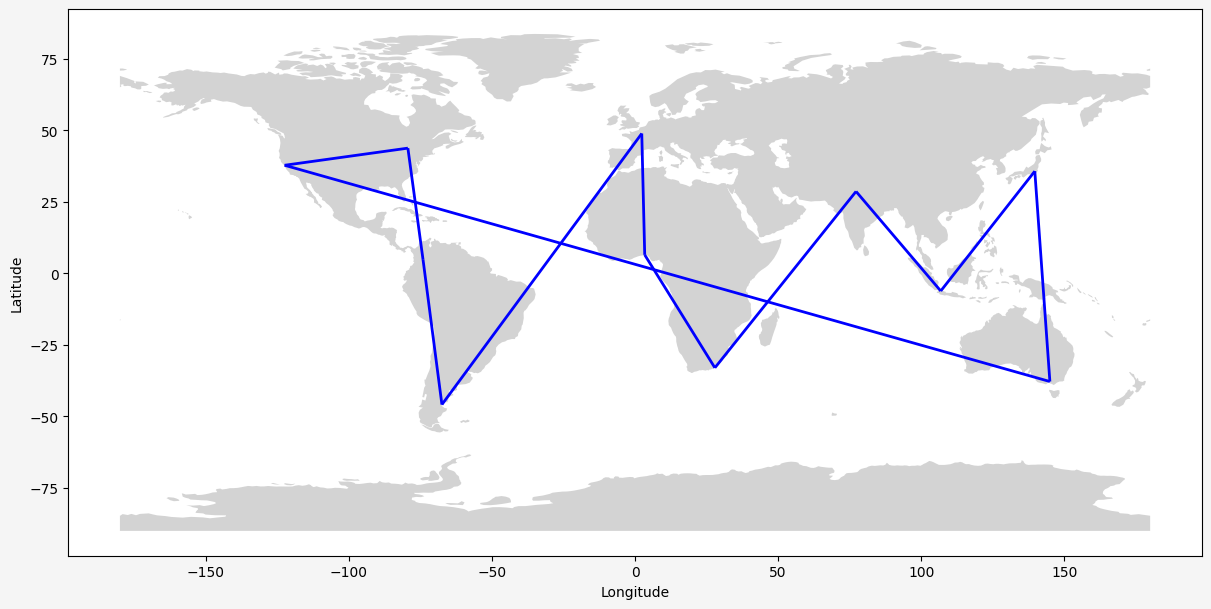

In [10]:
fig, ax = plt.subplots(figsize=(12, 8), facecolor="whitesmoke", layout="constrained")

world.plot(ax=ax, color="lightgrey")
lines_gdf.plot(ax=ax, color="blue", linewidth=2)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

# Polygons
---

In [11]:
triangle_a = [Point(*city) for city in [jakarta, san_francisco, tokyo]]

In [12]:
territory_a = Polygon(triangle_a)

In [13]:
triangle_gdf = gpd.GeoDataFrame(geometry=[territory_a])

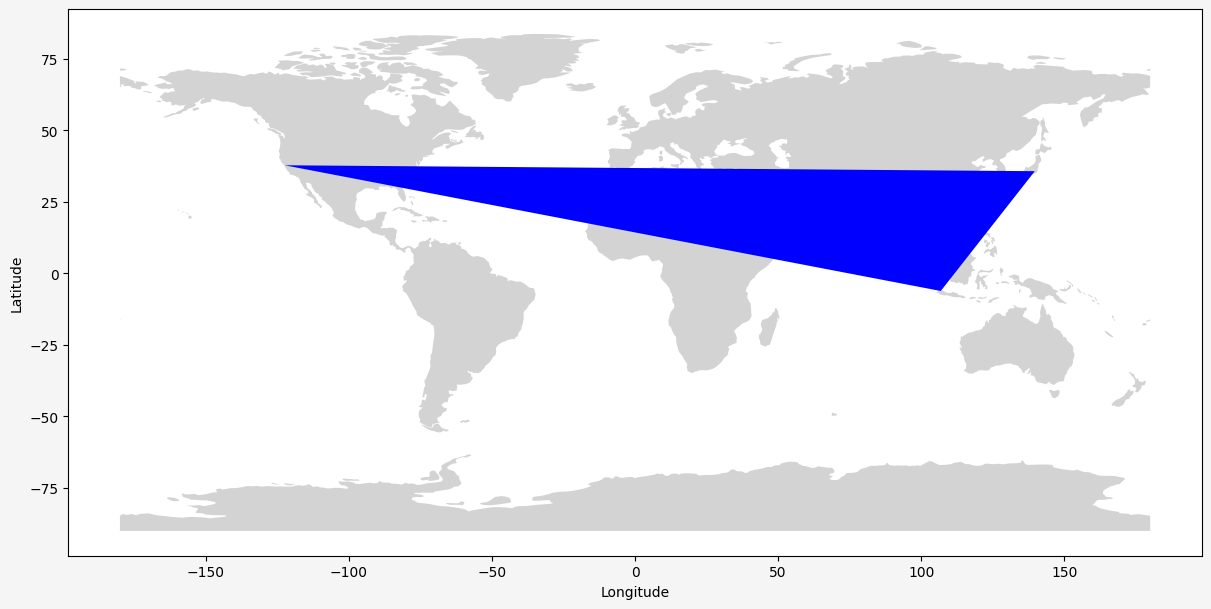

In [14]:
fig, ax = plt.subplots(figsize=(12, 8), facecolor="whitesmoke", layout="constrained")

world.plot(ax=ax, color="lightgrey")
triangle_gdf.plot(ax=ax, color="blue")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

In [15]:
triangle_b = [Point(*city) for city in [comodoro_rivadavia, lagos, paris]]

In [16]:
triangle_c = [Point(*city) for city in [delhi, east_london, melbourne]]

In [17]:
territory_b = Polygon(triangle_b)

In [18]:
territory_c = Polygon(triangle_c)

In [19]:
triangle_gdf = gpd.GeoDataFrame(geometry=[territory_a, territory_b, territory_c])

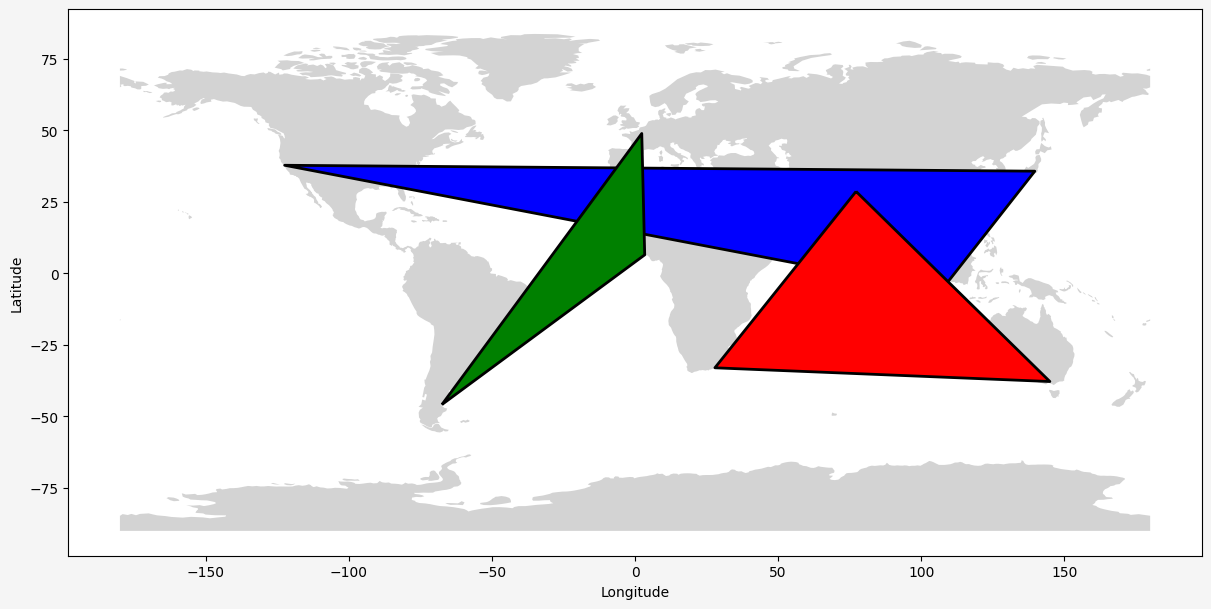

In [20]:
fig, ax = plt.subplots(figsize=(12, 8), facecolor="whitesmoke", layout="constrained")

world.plot(ax=ax, color="lightgrey")
triangle_gdf.plot(ax=ax, color=["blue", "green", "red"], edgecolor="black", linewidth=2)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

In [21]:
merged_territory = triangle_gdf.geometry.union_all()
merged_gdf = gpd.GeoDataFrame(geometry=[merged_territory])

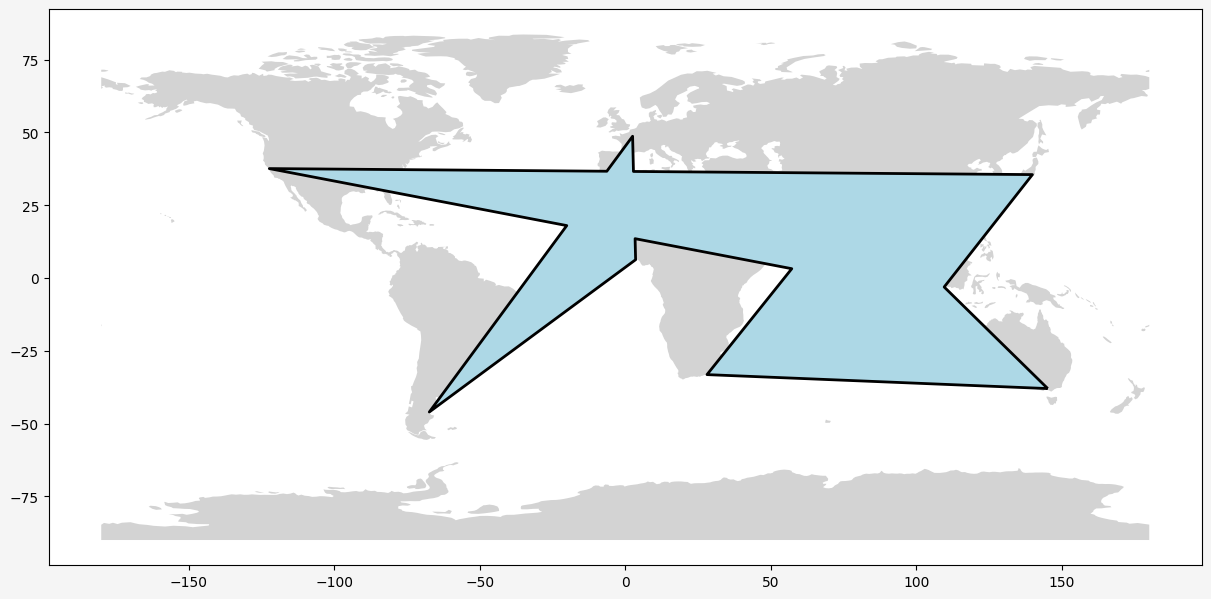

In [22]:
fig, ax = plt.subplots(figsize=(12, 8), facecolor="whitesmoke", layout="constrained")
world.plot(ax=ax, color="lightgrey")
merged_gdf.plot(ax=ax, color="lightblue", linewidth=2, edgecolor="black")

plt.show()

# Curved Lines
---

In [23]:
geod = Geod(ellps="WGS84") # Create ellipsoid
num_points = 100 # Adjust for smoothness

In [24]:
points = geod.npts(paris[0], paris[1], melbourne[0], melbourne[1], num_points)
points.insert(0, paris)
points.append(melbourne)

In [25]:
curved_line = LineString(points)

In [26]:
curved_line_gdf = gpd.GeoDataFrame(geometry=[curved_line])

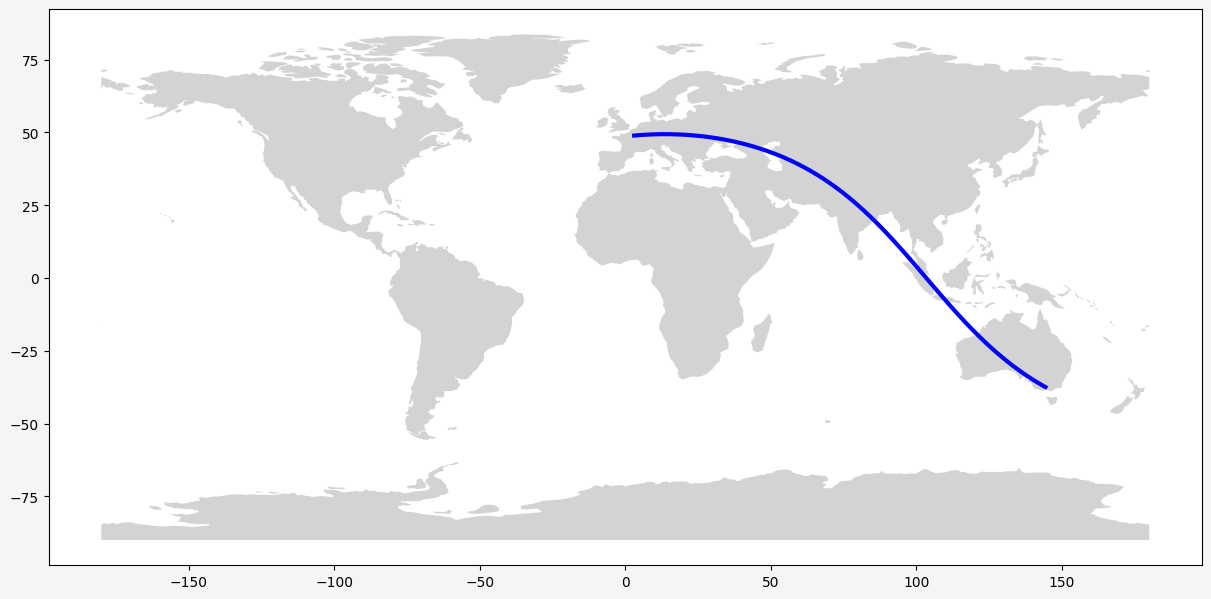

In [27]:
fig, ax = plt.subplots(figsize=(12, 8), facecolor="whitesmoke", layout="constrained")
world.plot(ax=ax, color="lightgrey")
curved_line_gdf.plot(ax=ax, color="blue", linewidth=3)

plt.show()